In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx
import collections


from sympy import Symbol, solve, log
import math

import random

# Part 3: Watts-Strogatz Networks

**A. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0,1 and 1. Calculate the average shortest path length  for each one. Describe what happens to the network when p=1.**

In [2]:
#generating 3 graphs using networkx
graph1=nx.watts_strogatz_graph(500, 4, 0, seed=None)
graph2=nx.watts_strogatz_graph(500, 4, 0.1, seed=None)
graph3=nx.watts_strogatz_graph(500, 4, 1, seed=None)

#using networkx in-build function to calculate the average shortest path length
print('Value d for graph 1 =',(nx.average_shortest_path_length(graph1, weight=None)))
print('Value d for graph 2 =',(nx.average_shortest_path_length(graph2, weight=None)))
print('Value d for graph 3 =',(nx.average_shortest_path_length(graph3, weight=None)))

Value d for graph 1 = 62.875751503006015
Value d for graph 2 = 7.743831663326653
Value d for graph 3 = 4.770821643286573


When p=1 the network is fully connected and complete. Hence the average path lenght is smaller compared to networks with a smaller p, as those nodes are more isolated.  

**B. Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of d as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

In [3]:
G=[]

n=500
k=4
N=50

for g1 in range(N):
    g1=nx.watts_strogatz_graph(n, k, 0, seed=None)
    G.append(nx.average_shortest_path_length(g1, weight=None))
    
for g2 in range(N):
    g2=nx.watts_strogatz_graph(n, k, 0.01, seed=None)
    G.append(nx.average_shortest_path_length(g2, weight=None))
    
for g3 in range(N):
    g3=nx.watts_strogatz_graph(n, k, 0.03, seed=None)
    G.append(nx.average_shortest_path_length(g3, weight=None))
    
for g4 in range(N):
    g4=nx.watts_strogatz_graph(n, k, 0.05, seed=None)
    G.append(nx.average_shortest_path_length(g4, weight=None))
    
for g5 in range(N):
    g5=nx.watts_strogatz_graph(n, k, 0.1, seed=None)
    G.append(nx.average_shortest_path_length(g5, weight=None))
    
for g6 in range(N):
    g6=nx.watts_strogatz_graph(n, k, 0.2, seed=None)
    G.append(nx.average_shortest_path_length(g6, weight=None))

df=pd.DataFrame(G, columns=['ASPL'])

In [4]:
df

ASPL
0    62.875752
1    62.875752
2    62.875752
3    62.875752
4    62.875752
..         ...
295   6.176064
296   6.193291
297   6.153371
298   6.354132
299   6.189747

[300 rows x 1 columns]

In [193]:
print(np.std(df[0:49]))
print(np.std(df[49:99]))
print(np.std(df[99:149]))
print(np.std(df[149:199]))
print(np.std(df[199:249]))
print(np.std(df[249:299]))

ASPL    4.263256e-14
dtype: float64
ASPL    7.619707
dtype: float64
ASPL    2.585085
dtype: float64
ASPL    0.695778
dtype: float64
ASPL    0.405211
dtype: float64
ASPL    0.288702
dtype: float64


c:\Users\scitu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


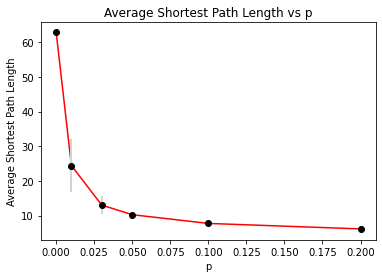

In [32]:
#Plotting the line graph with the mean where the clusters are with p=0,p=0.01,p=0.03,p=0.05,p=0.1,p=0.2. Use the std deviation to create error bars on the plot.

plt.plot([0,0.01,0.03,0.05,0.1,0.2],[np.mean(df[0:49]),np.mean(df[49:99]),np.mean(df[99:149]),np.mean(df[149:199]),np.mean(df[199:249]),np.mean(df[249:299])], color='red')
plt.errorbar([0,0.01,0.03,0.05,0.1,0.2], [np.mean(df['ASPL'][0:49]),np.mean(df['ASPL'][49:99]),np.mean(df['ASPL'][99:149]),np.mean(df['ASPL'][149:199]),np.mean(df['ASPL'][199:249]),np.mean(df['ASPL'][249:299])], yerr=[4.263256e-14,7.619707,2.585085,0.695778,0.405211,0.288702], fmt='o', color='black', ecolor='lightgray' , capsize=0,elinewidth=2)

plt.xlabel('p')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs p')
plt.show()





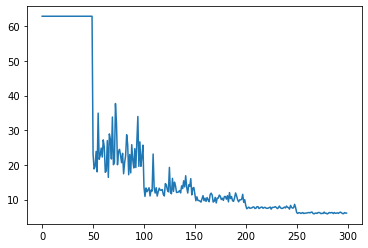

In [173]:




plt.plot(df)


# Part 4. The Barabasi-Albert Model

**We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success**

**A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

''

''

5000

[(5000, 142), (5000, 30), (5000, 1559)]

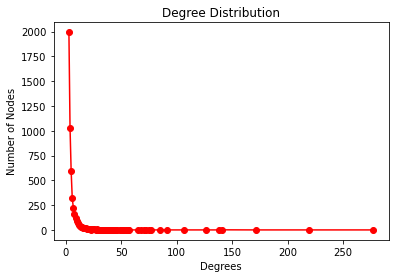

In [34]:
def barabasi_add_nodes(g, n, m0):
    m = m0 - 1
  
    for i in range(m0 + 1, n + 1):
        g.add_node(i)
        degrees = nx.degree(g)
        node_prob = {}
  
        s = 0
        for j in degrees:
            s += j[1]
        #print(g.nodes())
          
        for each in g.nodes():
            node_prob[each] = (float)(degrees[each]) / s
  
        node_probabilities_cum = []
        prev = 0
          
        for n, p in node_prob.items():
            temp = [n, prev + p]
            node_probabilities_cum.append(temp)
            prev += p
  
        new_edges = []
        num_edges_added = 0
        target_nodes = []
  
        while (num_edges_added < m):
            prev_cum = 0
            r = random.random()
            k = 0
              
            while (not (r > prev_cum and r <= node_probabilities_cum[k][1])):
                prev_cum = node_probabilities_cum[k][1]
                k = k + 1
            target_node = node_probabilities_cum[k][0]
              
            if target_node in target_nodes:
                continue
              
            else:
                target_nodes.append(target_node)
            g.add_edge(i, target_node)
            num_edges_added += 1
            new_edges.append((i, target_node))
  
       # print(num_edges_added, ' edges added')
  
    display(g, i, new_edges)
    return g
  
def plot_deg_dist(g):
    all_degrees = []
      
    for i in nx.degree(g):
        all_degrees.append(i[1])
    unique_degrees = list(set(all_degrees))
    unique_degrees.sort()
    count_of_degrees = []
  
    for i in unique_degrees:
        c = all_degrees.count(i)
        count_of_degrees.append(c)
  




   # print(unique_degrees)
    #print(count_of_degrees)
  
    plt.plot(unique_degrees, count_of_degrees, 'ro-')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.title('Degree Distribution')
    plt.show()
  
  
N = 5000
m0 = random.randint(2, N / 1000)
g = nx.path_graph(m0)
display(g, '', '')
  
g = barabasi_add_nodes(g, N, m0)
plot_deg_dist(g)

# Part 5. Power-laws and the friendship paradox

A. The friendship paradox in BA networks

* Pick a node i at random (e.g. use random.choice). Find its degree.

In [35]:
random_node=random.choice(list(g.nodes()))

In [36]:
print(random_node)

4428


In [38]:
g.degree[random_node]

3

* Find i's neighbors. And calculate their average degree.

In [39]:
print(list(g.neighbors(random_node)))

[681, 4348, 3858]


In [40]:
mean = lambda l: sum(l)/len(l)

average_degree=mean([g.degree(random_node) for random_node in g.neighbors(random_node)])
print(average_degree)

5.666666666666667


* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.

On average it is true that i's friends have more friends that i. i have in this case 174 while i's friends have 305.

* Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [41]:
count=0

for i in range(1000):
    random_node=random.choice(list(g.nodes()))
    node_degree=g.degree[random_node]
    average_degree=mean([g.degree(random_node) for random_node in g.neighbors(random_node)])

    if average_degree>node_degree:
           count=count+1

print(count)

909


B. The friendship paradox more generally

* What if the power law is flatter, e.g. p(k)∼k−γ with γ=1.5? Will the fraction of times the paradox is true be higher or lower?

In [66]:

#Creating the Sune netwotk

sune=nx.Graph()
sune.add_nodes_from(range(1,5001))

#Add random edgse between them

for i in range(1,5001):
    sune.add_edge(random.randint(1,5000),random.randint(1,5000))

#The degree distribution of the sune network.

all_degrees_Sune = []

for i in nx.degree(sune):
    all_degrees_Sune.append(i[1])
unique_degrees_Sune = list(set(all_degrees_Sune))
unique_degrees_Sune.sort()
count_of_degrees_Sune = []

for i in unique_degrees_Sune:
    c = all_degrees_Sune.count(i)
    count_of_degrees_Sune.append(c)




In [71]:
#Generating an ER network

er=nx.erdos_renyi_graph(5000,0.001)


#The degree distribution of the ER network.

all_degrees_er = []

for i in nx.degree(er):
    all_degrees_er.append(i[1])
unique_degrees_er = list(set(all_degrees))
unique_degrees_er.sort()
count_of_degrees_er = []

for i in unique_degrees_er:
    c = all_degrees_er.count(i)
    count_of_degrees_er.append(c)


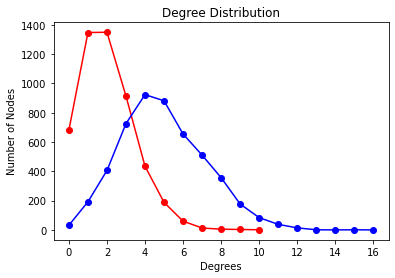

In [74]:
#plotting the networks in the same plot

plt.plot(unique_degrees_Sune, count_of_degrees_Sune, 'ro-', label='Sune')
plt.plot(unique_degrees_er, count_of_degrees_er, 'bo-', label='ER')
plt.xlabel('Degrees')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.show()


### The Sune network has a power law distribution, while the ER network has a uniform distribution.


In [45]:
#Calculate the average degree 

mean = lambda l: sum(l)/len(l)

average_degree_Sune=mean([sune.degree(random_node) for random_node in sune.neighbors(random_node)])
print(average_degree_Sune)

average_degree_ER=mean([er.degree(random_node) for random_node in er.neighbors(random_node)])
print(average_degree_ER)

3.5
6.4


In [56]:
#calculate the clustering coefficient 

print(nx.average_clustering(sune))

print(nx.average_clustering(er))




0.00020952380952380954
0.0009015728715728711


In [75]:
#calculate the number of connected components

print(nx.number_connected_components(sune))

print(nx.number_connected_components(er))



815
35
